In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# ============================================================
# samples = use your model here
# Shape: (num_samples, num_spins)
# Spins assumed in {0,1}
# ============================================================

#samples = ...  # <- plug in your tensor here
#print("Samples shape:", samples.shape)

## Why Perform Spectral Analysis?

Magnetization only probes uniform order:

$$
M_z = \frac{1}{N}\sum_i \sigma_i
$$

However, spatial structure is encoded in momentum space.

The key object is the structure factor:

$$
S(k) = \left|\sum_j e^{ikx_j}\sigma_j \right|^2
$$

Why this matters:

- Ferromagnetic order → peak at $k = 0$
- Antiferromagnetic order → peak at $k = \pi$
- Short-range correlations → broadened peaks
- Criticality → scale-dependent spectrum

If a learned model reproduces the correct physics, its samples should exhibit the correct spectral features.

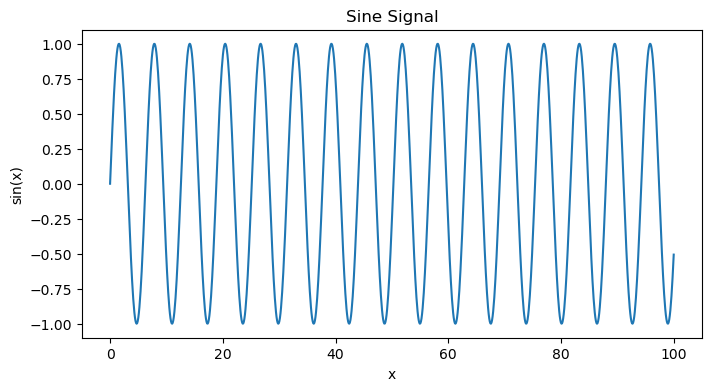

In [4]:
# simple demo with sine

x = np.linspace(0, 100, 1000)
y = np.sin(x)

plt.figure(figsize=(8,4))
plt.plot(x, y)
plt.title("Sine Signal")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()

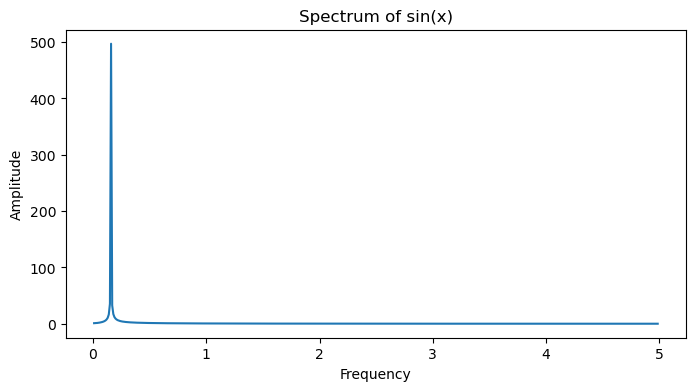

In [5]:
dx = x[1] - x[0]

fft_y = np.fft.fft(y)
frequencies = np.fft.fftfreq(len(y), d=dx)

positive = frequencies > 0

plt.figure(figsize=(8,4))
plt.plot(frequencies[positive], np.abs(fft_y)[positive])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Spectrum of sin(x)")
plt.show()

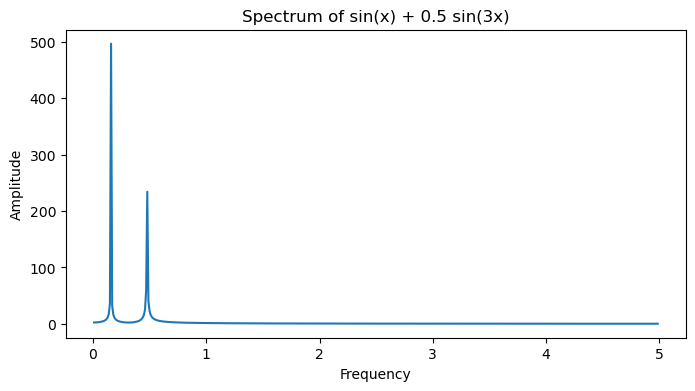

In [6]:
y2 = np.sin(x) + 0.5*np.sin(3*x)
fft_y2 = np.fft.fft(y2)

plt.figure(figsize=(8,4))
plt.plot(frequencies[positive], np.abs(fft_y2)[positive])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Spectrum of sin(x) + 0.5 sin(3x)")
plt.show()

In [ ]:
# Convert spins {0,1} -> {+1,-1}
spins = 1 - 2 * samples.numpy()

print("Converted spins shape:", spins.shape)

In [ ]:
config = spins[0]

fft_spin = np.fft.fft(config)
k_vals = np.fft.fftfreq(len(config))

positive = k_vals >= 0

plt.figure(figsize=(8,4))
plt.plot(k_vals[positive], np.abs(fft_spin)[positive]**2)
plt.xlabel("Momentum k")
plt.ylabel("Structure Factor")
plt.title("Single Configuration Structure Factor")
plt.show()

In [ ]:
S_accum = 0

for config in spins:
    fft_spin = np.fft.fft(config)
    S_accum += np.abs(fft_spin)**2

S_mean = S_accum / len(spins)

plt.figure(figsize=(8,4))
plt.plot(k_vals[positive], S_mean[positive])
plt.xlabel("Momentum k")
plt.ylabel("Average Structure Factor")
plt.title("Mean Structure Factor")
plt.show()
